# Konservative Methoden

Das autonome Anfangswertproblem

\begin{split}
\dot{x}(t) & = y(t)\\
\dot{y}(t) & = -x(t)	
\end{split}

und

$$(x(0),y(0)) = (0,1)$$

besitzt die analytische Lösung

$$(x(t),y(t)) = (\sin(t),\cos(t)).$$

Es gilt
$$x^2(t) + y^2(t) \equiv 1\quad \text{für alle}\ t$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from odeSolvers import classicRungeKutta, implicitMidpoint, implicitEuler

In Vektor-Notation folgt für das Anfangswertproblem

$$\begin{pmatrix}\dot{x}(t)\\\dot{y}(t)\end{pmatrix} = \mathbf{f}(t,(x,y)^T)$$
mit
$$\mathbf{f}(t,(x,y)^T) = \begin{pmatrix}y(t)\\-x(t)\end{pmatrix}.$$

Für die Anwendung impliziter Methoden benötigen wir die Jacobi-Matrix von $\mathbf{f}$ bezüglich $(x,y)^T$:

$$\mathbf{f}'(t,(x,y)^T) = \begin{pmatrix}0 & 1\\-1 & 0\end{pmatrix}.$$



In [3]:
# rechte Seite f(t,(x,y)) des Anfangswertproblems
def f(x,y):
        return np.array([y[1],-y[0]])
# Jacobi-Matrix der rechten Seite bezüglich (x,y)
def df(x,y):
    return np.array([[0.,1.],[-1.,0.]])

Der Anfangswert ist gegeben durch $(0,1)^T$.

In [4]:
y0 = np.array([0.,1.])

In [5]:
h = 0.1
(tIE,yIE) = implicitEuler(40, h, y0, f, df)

Für das implizite Euler Verfahren haben wir

$$\begin{pmatrix}x_{n+1}\\y_{n+1}\end{pmatrix} = \frac{1}{1+h^2} \begin{pmatrix}x_{n}\\y_{n}\end{pmatrix}$$

erhalten. Damit folgt, dass das Verfahren die Energie nicht erhält. Man spricht hier auch von "numerischer" Reibung.

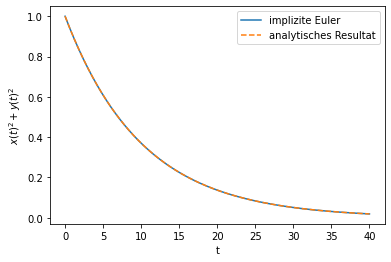

In [6]:
plt.plot(tIE,yIE[:,0]**2+yIE[:,1]**2, label='implizite Euler')
plt.plot(tIE,1/(1+h**2)**np.arange(tIE.shape[0]),'--', label='analytisches Resultat')
plt.legend()
plt.xlabel('t')
plt.ylabel(r'$x(t)^2+y(t)^2$')
plt.show()

In [7]:
(tIM,yIM) = implicitMidpoint(400, 1, y0, f, df)
(tRK,yRK) = classicRungeKutta(400, 1, y0, f)
(tIM2,yIM2) = implicitMidpoint(400, .5, y0, f, df)
(tRK2,yRK2) = classicRungeKutta(400, .5, y0, f)

Die numerische Lösung im Phasendiagram dargestellt liefert uns für die beiden Lösungen den folgenden Graphen:

In [8]:
from odeSolversVisualization import myplot

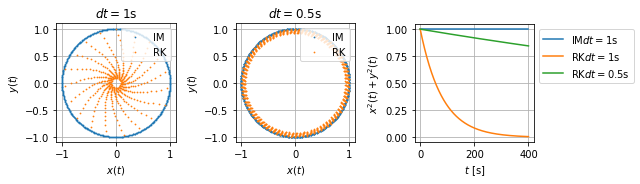

In [9]:
myplot(tIM,yIM,tRK,yRK,tIM2,yIM2,tRK2,yRK2,r'$dt =1$s',r'$dt =0.5$s')

Für das Testproblem kann $x_{k+1}^2+y_{k+1}^2$ für das Runge-Kutta 4. Ordnung explizit berechnet werden (vgl. Skript). Es gilt

$$x_{k+1}^2+y_{k+1}^2 = \underbrace{(1-\frac{h^6}{72}+\frac{h^8}{576})}_{\kappa(h)} \cdot (x_{k+1}^2+y_{k+1}^2)$$

Für $h = 2\sqrt{2}$ gilt $\kappa(h) = 1$ und für $h>2\sqrt{2}$ ist das Verfahren instabil.

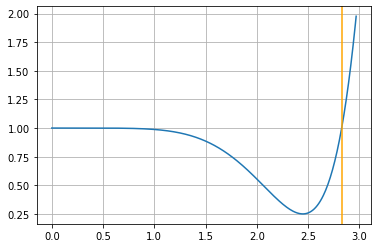

In [10]:
h = np.linspace(0,2.1*np.sqrt(2),400)
plt.plot(h,np.abs(1-h**6/72+h**8/576))
plt.axvline(2*np.sqrt(2),c='orange')
plt.grid()

In [11]:
(tIM3,yIM3) = implicitMidpoint(400, 2*np.sqrt(2), y0, f, df)
(tRK3,yRK3) = classicRungeKutta(400, 2*np.sqrt(2), y0, f)

In [12]:
(tIM4,yIM4) = implicitMidpoint(400, 2.0008*np.sqrt(2), y0, f, df)
(tRK4,yRK4) = classicRungeKutta(400, 2.0008*np.sqrt(2), y0, f)

In [13]:
myplot(tIM3,yIM3,tRK3,yRK3,tIM4,yIM4,tRK4,yRK4,r'$dt =2\sqrt{2}$s',r'$dt =2.0008\sqrt{2}$s')